# Assignment 9: Neural Networks
### Choosen Datasets:

**Linear Regression**

[Fuel Consumption 2014](https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption)

Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

**Binary Classification**

[Cancer Detection Dataset]([http://mlearn.ics.uci.edu/MLRepository.html])

The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics.

<hr>

### Group Members:


*   Ali Zahedzadeh
*   Melika Noubakhtian


<hr>

## **Linear Regression**

Linear regression analysis is used to predict the value of a variable based on the value of another variable

### About The Dataset 

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

**Import Libraries**

In [581]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Dataset**

In [582]:
path = './FuelConsumptionCo2.csv'
df = pd.read_csv(path)

Now let's take a look at the first 5 rows of the data:

In [583]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


```df.info()``` shows that we have no NaN value.

In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [585]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Check Null values (We don't have any null values)

In [586]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

Check for duplicate values , we dont have any duplicate value

In [587]:
df[df.duplicated]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS


**Correlation** 

 correlation matrix is a useful tool for figuring out how different variables are related to each other. By looking at the correlation coefficients between two variables, we can learn how they are related and how changes in one variable may affect the other variables

First we need to convert non numerical values to numerical values

In [588]:
from sklearn.preprocessing import LabelEncoder

Select columns for eoncoding

In [589]:
categorical_column = ['MAKE', 'MODEL', 'TRANSMISSION', 'VEHICLECLASS']
one_hot_column = ['FUELTYPE']

an object of LabelEncoder

In [590]:
le_encoder = LabelEncoder()

Set Categorical encoding for selected columns

In [591]:
df[categorical_column] = df[categorical_column].apply(LabelEncoder().fit_transform)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,0,329,0,2.0,4,10,Z,9.9,6.7,8.5,33,196
1,2014,0,329,0,2.4,4,20,Z,11.2,7.7,9.6,29,221
2,2014,0,330,0,1.5,4,17,Z,6.0,5.8,5.9,48,136
3,2014,0,389,11,3.5,6,11,Z,12.7,9.1,11.1,25,255
4,2014,0,483,11,3.5,6,11,Z,12.1,8.7,10.6,27,244


Set One hot encoding for selected column

In [592]:
df = pd.get_dummies(df, columns=one_hot_column)

In [593]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2014,0,329,0,2.0,4,10,9.9,6.7,8.5,33,196,False,False,False,True
1,2014,0,329,0,2.4,4,20,11.2,7.7,9.6,29,221,False,False,False,True
2,2014,0,330,0,1.5,4,17,6.0,5.8,5.9,48,136,False,False,False,True
3,2014,0,389,11,3.5,6,11,12.7,9.1,11.1,25,255,False,False,False,True
4,2014,0,483,11,3.5,6,11,12.1,8.7,10.6,27,244,False,False,False,True


In [594]:
corr = df.drop(columns=['MODELYEAR']).corr()
corr.style.background_gradient(cmap='coolwarm')

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELTYPE_D,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
MAKE,1.000000,0.039068,0.005853,-0.166416,-0.203427,0.193264,-0.246247,-0.174665,-0.222273,0.226347,-0.186504,0.057305,-0.158673,0.102489,-0.031904
MODEL,0.039068,1.000000,0.244648,0.096304,0.080010,-0.002004,0.147394,0.182009,0.161373,-0.148806,0.155492,-0.088906,0.060654,0.090685,-0.098477
VEHICLECLASS,0.005853,0.244648,1.000000,0.240529,0.208528,-0.172934,0.354363,0.430074,0.384678,-0.354073,0.388468,-0.024735,0.125846,0.003160,-0.067216
ENGINESIZE,-0.166416,0.096304,0.240529,1.000000,0.934011,-0.272427,0.832225,0.778746,0.819482,-0.808554,0.874154,-0.093400,0.237674,-0.266920,0.165557
CYLINDERS,-0.203427,0.080010,0.208528,0.934011,1.000000,-0.246456,0.796473,0.724594,0.776788,-0.770430,0.849685,-0.067955,0.194920,-0.339827,0.256011
TRANSMISSION,0.193264,-0.002004,-0.172934,-0.272427,-0.246456,1.000000,-0.350241,-0.348174,-0.352596,0.341119,-0.299393,0.004390,-0.245111,-0.038929,0.178253
FUELCONSUMPTION_CITY,-0.246247,0.147394,0.354363,0.832225,0.796473,-0.350241,1.000000,0.965718,0.995542,-0.935613,0.898039,-0.139180,0.567070,-0.319701,0.045660
FUELCONSUMPTION_HWY,-0.174665,0.182009,0.430074,0.778746,0.724594,-0.348174,0.965718,1.000000,0.985804,-0.893809,0.861748,-0.154498,0.598684,-0.269105,-0.018973
FUELCONSUMPTION_COMB,-0.222273,0.161373,0.384678,0.819482,0.776788,-0.352596,0.995542,0.985804,1.000000,-0.927965,0.892129,-0.145396,0.583125,-0.303950,0.022451
FUELCONSUMPTION_COMB_MPG,0.226347,-0.148806,-0.354073,-0.808554,-0.770430,0.341119,-0.935613,-0.893809,-0.927965,1.000000,-0.906394,0.176731,-0.425172,0.300779,-0.119499


Our goal is to predict the amount of CO2 EMISSION based on the available data

Let's select some features to explore more.
based on above corr matrix we select 3 of high corr (becase if corr is higher it's mean good relation beetwen variables)

In [595]:
data = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

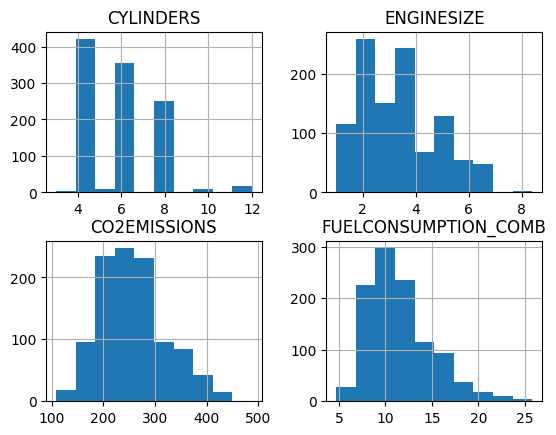

In [596]:
viz = data[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

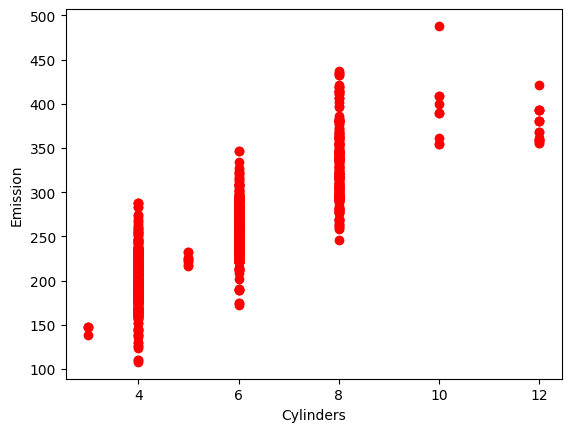

In [597]:
plt.scatter(data.CYLINDERS, data.CO2EMISSIONS, color='red')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

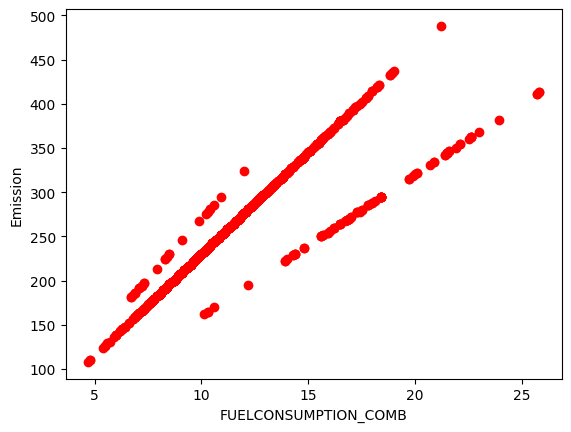

In [598]:
plt.scatter(data.FUELCONSUMPTION_COMB, data.CO2EMISSIONS, color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

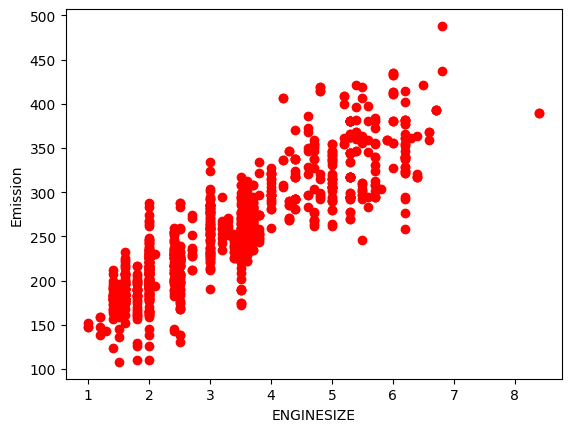

In [599]:
plt.scatter(data.ENGINESIZE, data.CO2EMISSIONS, color='red')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

From above charts we decide to Use ```ENGINESIZE```  for regression

Because There is a relatively linear relationship

<hr>

**Select features for `Regression`**

In [600]:
#Function for split data beetwen Train and Split
from sklearn.model_selection import train_test_split

X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]
y = df['CO2EMISSIONS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

### **`Multilayer Perceptron with Scikit-Learn - Regression`**

**Import Libraries**

In [601]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

Create an instance of the MLPRegressor and train it using the training data.

In [602]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=27)
mlp_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=27)

Use the trained model to make predictions on the test data.

In [603]:
y_pred = mlp_model.predict(X_test)

Assess the performance of MLP model. (Our `R2-Score` is above than 0.8)

In [604]:
r2_score(y_test, y_pred)

0.9551296112925918

### **`4-layer feedforward network with Keras - Regression`**

In [605]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from numpy.random import seed
import tensorflow as tf

**Normalization/Standardization**

The data is standardized using `StandardScaler` to scale the features.

In [606]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Build NN model**

We use `Sequential` from Keras to create a sequential model.

The `Dense` layers define fully connected layers in the neural network.

In [607]:
# Set a random seed for reproducibility
seed(27)
tf.random.set_seed(27)

# Build the neural network model

model = Sequential()
# Add a layer with 64 hidden neurons
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
# Add a layer with 32 hidden neurons
model.add(Dense(32, activation='relu'))
# Add a layer with 16 hidden neurons
model.add(Dense(16, activation='relu'))
# Add the output layer, with sigmoid activation fuction (to predict the rain)
model.add(Dense(1, activation='linear'))

**Model Training**

The activation functions used are `relu` for hidden layers and `linear` for the output layer as it is a regression task.

The model is compiled using the `Adam` optimizer and mean squared error as the loss function.

In [608]:
# Set a random seed for reproducibility
seed(27)
tf.random.set_seed(27)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()

Epoch 1/100


22/22 [==============================] - 1s 8ms/step - loss: 70168.4375 - mse: 70168.4375 - val_loss: 68206.0312 - val_mse: 68206.0312
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 69682.5547 - mse: 69682.5547 - val_loss: 67469.6172 - val_mse: 67469.6172
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 68520.5781 - mse: 68520.5781 - val_loss: 65506.4141 - val_mse: 65506.4141
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 65355.5469 - mse: 65355.5469 - val_loss: 60343.3984 - val_mse: 60343.3984
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 57876.4453 - mse: 57876.4453 - val_loss: 49511.2109 - val_mse: 49511.2109
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 44256.6055 - mse: 44256.6055 - val_loss: 32645.5723 - val_mse: 32645.5723
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 26403.2441 - mse: 26403.2441 - val_loss: 16485.0098 - val

**Evaluate the model**

Finally, we make predictions on the test set and evaluate the model using regression metrics.

In [609]:
r2_score(y_test, y_pred)

0.9533223774820925

Let's see the progress of our algorithm in each iteration:

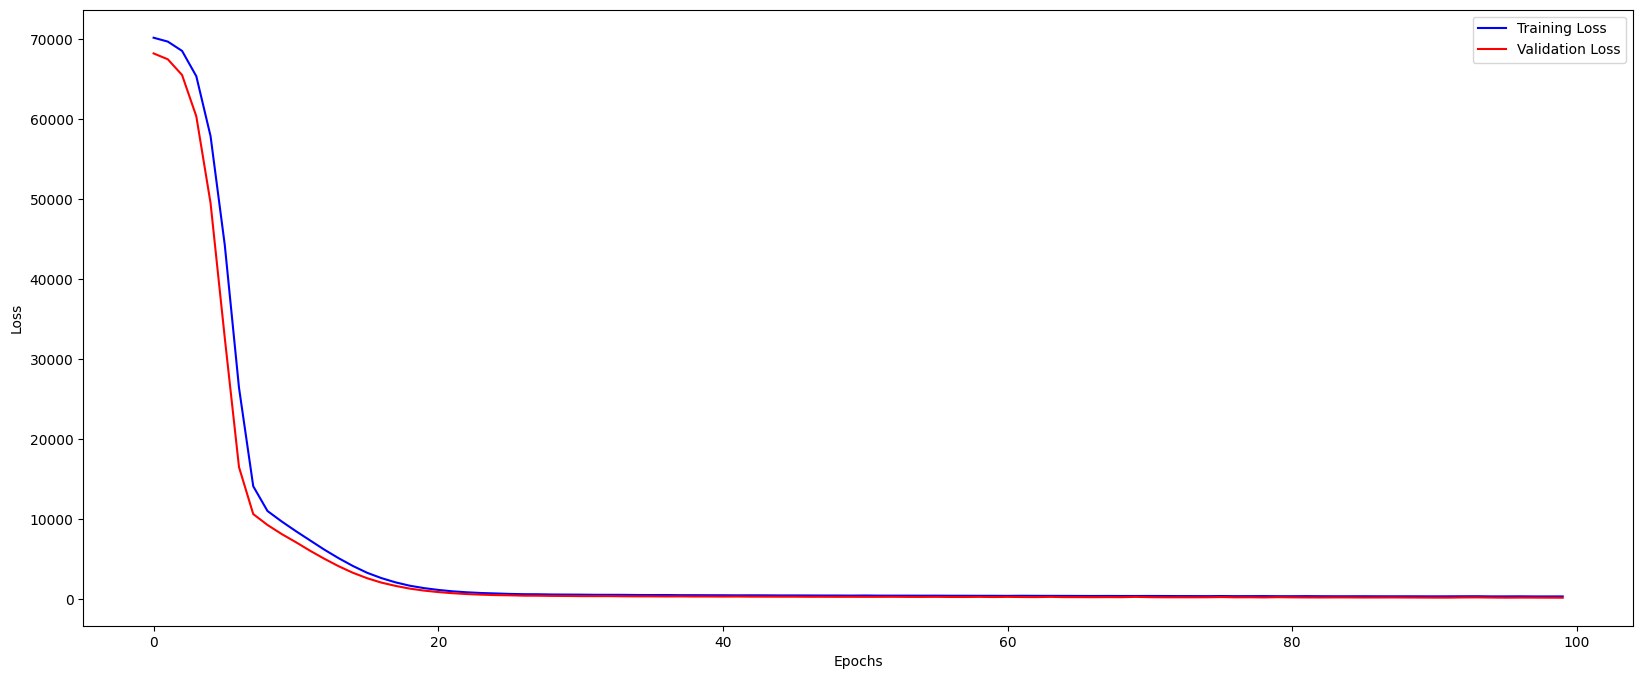

In [610]:
hist_df = pd.DataFrame(history.history)
plt.figure(figsize=(20, 8))
plt.plot(hist_df['loss'], 'blue', label='Training Loss')
plt.plot(hist_df['val_loss'], 'red', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()


### **`4-layer feedforward network with Pytorch - Regression`**

**Import libraries**

Importing the necessary PyTorch modules for creating and training the neural network.

In [611]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

**Preparing Data**

Converting the training data (`X_train_scaled` and `y_train`) to PyTorch tensors.

In [612]:
# Assuming X_train_scaled and y_train are your scaled feature matrix and target variable
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values.reshape(-1, 1))
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values.reshape(-1, 1))

**Set Hyperparameters**

Defining hyperparameters such as the input size, sizes of hidden layers, output size, learning rate, and the number of training epochs.

In [613]:
# Hyperparameters
input_size = X_train_tensor.shape[1]
hidden_size1 = 64
hidden_size2 = 32
hidden_size3 = 16
output_size = 1
learning_rate = 0.001
num_epochs = 100

**Model Definition**

Creating a sequential neural network model with four linear layers and ReLU activation functions.

In [614]:
# Set a random seed for reproducibility
seed(27)
tf.random.set_seed(27)

# Define the model
model = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.ReLU(),
    nn.Linear(hidden_size1, hidden_size2),
    nn.ReLU(),
    nn.Linear(hidden_size2, hidden_size3),
    nn.ReLU(),
    nn.Linear(hidden_size3, output_size)
)

**Loss Function and Optimizer**

Defining Mean Squared Error (MSE) as the loss function and using the Adam optimizer.

In [615]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

**Data Loading**

Creating a PyTorch DataLoader to handle batching during training.

In [616]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

**Training Loop**

Iterating through epochs and batches, performing forward and backward passes, and updating the model parameters.

In [617]:
# Set a random seed for reproducibility
seed(27)
tf.random.set_seed(27)

# Training loop
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 12400.4980
Epoch [20/100], Loss: 3759.0974
Epoch [30/100], Loss: 894.0394
Epoch [40/100], Loss: 693.4962
Epoch [50/100], Loss: 322.2626
Epoch [60/100], Loss: 494.4245
Epoch [70/100], Loss: 948.9197
Epoch [80/100], Loss: 472.0536
Epoch [90/100], Loss: 401.7664
Epoch [100/100], Loss: 730.5134


**Make Predictions**

Use trained model to make predictions on the test set:

In [618]:
# Set a random seed for reproducibility
seed(27)
tf.random.set_seed(27)

with torch.no_grad():
    model.eval()  # Set the model to evaluation mode
    y_pred = model(X_test_tensor)

**Evaluate Performance**

Use appropriate metrics to evaluate the performance of your model.

In [619]:
# Assuming you already have y_test_tensor and y_pred
y_test_numpy = y_test_tensor.numpy()
y_pred_numpy = y_pred.numpy()

# Calculate R-squared
r2_score(y_test_numpy, y_pred_numpy)

0.8765352433286084

**Visualize Predictions**

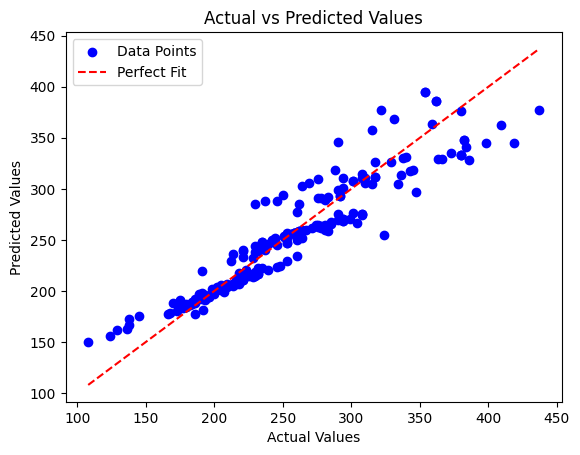

In [620]:
y_test_numpy = y_test_tensor.numpy()
y_pred_numpy = y_pred.numpy()

plt.scatter(y_test_numpy, y_pred_numpy, c='blue', label='Data Points')
plt.plot([min(y_test_numpy), max(y_test_numpy)], [min(y_test_numpy), max(y_test_numpy)], '--', c='red', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


### **`4-layer non-sequential feedforward network with Keras - Regression`**

**Import Libraries**

Here, we import the necessary libraries from TensorFlow and Keras.

In [621]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

**Define input layer**

creates an input layer that takes input with a shape of `(input_dim,)`

In [622]:
input_dim = X_train.shape[1]
input_layer = Input(shape=(X_train_scaled.shape[1],))

**Define Hidden Layers**

define fully connected (dense) hidden layers with a specified number of units and ReLU activation function.

Each layer takes the output of the previous layer as its input.

In [623]:
# Set a random seed for reproducibility
seed(27)
tf.random.set_seed(27)

hidden_layer1 = Dense(64, activation='relu')(input_layer)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(16, activation='relu')(hidden_layer2)

**Define Output Layer**

define the output layer with 1 unit (for regression) and a linear activation function.


In [624]:
output_layer = Dense(1, activation='linear')(hidden_layer3)

**Create the Model**

create a Keras Model, specifying the input and output layers.

In [625]:
# Set a random seed for reproducibility
seed(27)
tf.random.set_seed(27)

model = Model(inputs=input_layer, outputs=output_layer)

**Compile the model**

In [626]:
# Set a random seed for reproducibility
seed(27)
tf.random.set_seed(27)

model.compile(optimizer='adam', loss='mean_squared_error')

**Train the model**

In [627]:
# Set a random seed for reproducibility
seed(27)
tf.random.set_seed(27)

model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


22/22 [==============================] - 1s 8ms/step - loss: 70131.7344 - val_loss: 68131.9688
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 69570.6797 - val_loss: 67285.5312
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 68223.0781 - val_loss: 65076.8672
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 64946.9922 - val_loss: 60160.0508
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 58270.8203 - val_loss: 51012.5430
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 47067.0977 - val_loss: 37238.1797
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 32012.9082 - val_loss: 22192.2930
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 18560.4609 - val_loss: 12818.8203
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 12452.9775 - val_loss: 10191.6396
Epoch 10/100
22/22 [=============================

**Display Model Summary**

This prints a summary of the model architecture, including the number of parameters in each layer.

In [628]:
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_192 (Dense)           (None, 64)                320       
                                                                 
 dense_193 (Dense)           (None, 32)                2080      
                                                                 
 dense_194 (Dense)           (None, 16)                528       
                                                                 
 dense_195 (Dense)           (None, 1)                 17        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Make predictions on the test set**

In [629]:
y_pred = model.predict(X_test_scaled).flatten()

7/7 [==============================] - 0s 1ms/step


**Evaluate the model**

In [630]:
r2_score(y_test, y_pred)

0.9508018528243659

Let's see the progress of our algorithm in each iteration:

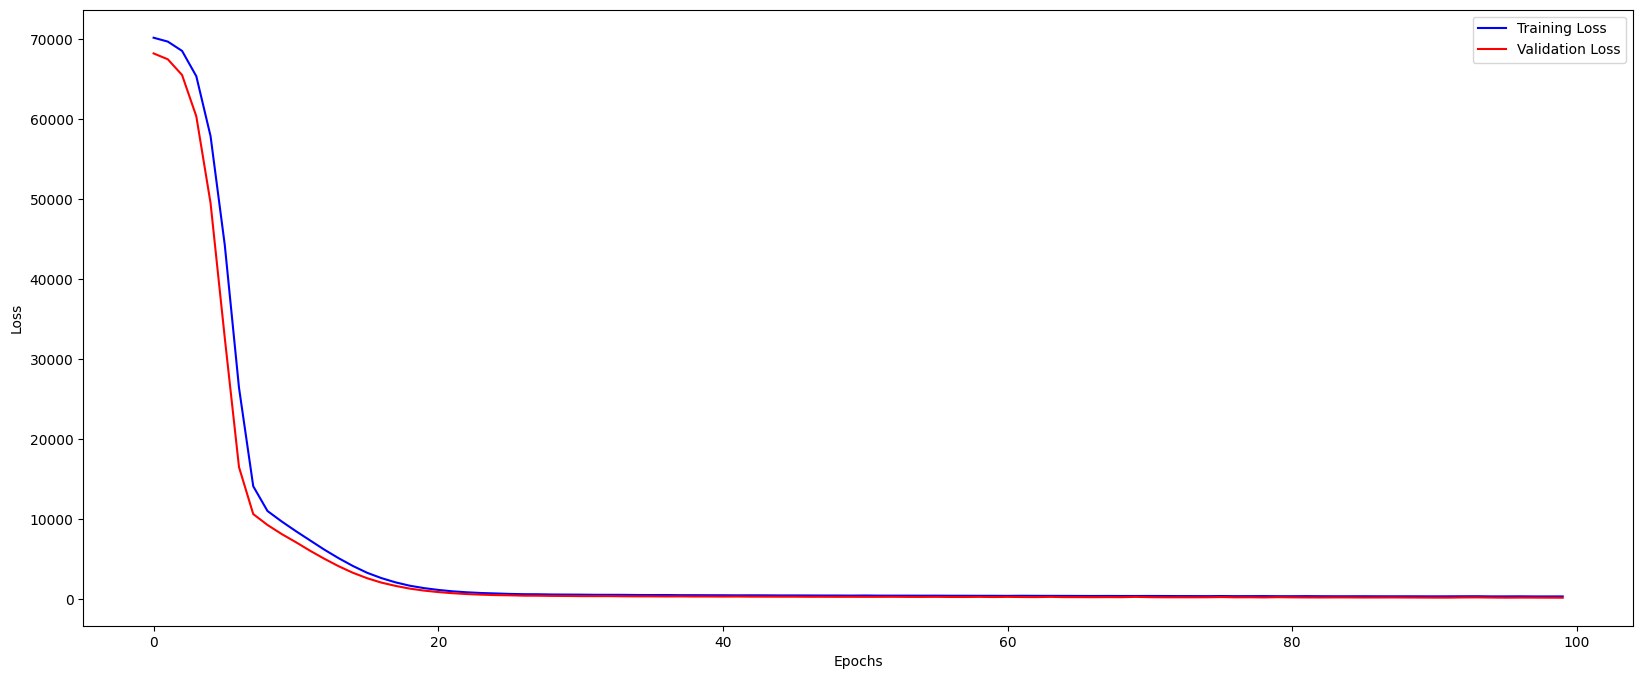

In [631]:
hist_df = pd.DataFrame(history.history)
plt.figure(figsize=(20, 8))
plt.plot(hist_df['loss'], 'blue', label='Training Loss')
plt.plot(hist_df['val_loss'], 'red', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

<hr>

## **Binary Classification**

### About The Dataset 

<div dir=ltr style="direction: ltr;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<center>

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign(value = 2) - malignant(value = 4)|

</center>
</font>
</div>

**Reading Dataset**

In [632]:
path = './cell_samples.csv'
df = pd.read_csv(path)

Now let's take a look at the first 5 rows of the data:

In [633]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


```df.info()``` 

This methods give us data about our dataset.

It shows that we have no NaN value.

In [634]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [635]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Check Null values (We don't have any null values)

In [636]:
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

**Check for duplicate values**

we have duplicate value so we must drop it

In [637]:
df[df.duplicated]

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [638]:
df = df.drop_duplicates()

In [639]:
df[df.duplicated]

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class


In [640]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           691 non-null    int64 
 1   Clump        691 non-null    int64 
 2   UnifSize     691 non-null    int64 
 3   UnifShape    691 non-null    int64 
 4   MargAdh      691 non-null    int64 
 5   SingEpiSize  691 non-null    int64 
 6   BareNuc      691 non-null    object
 7   BlandChrom   691 non-null    int64 
 8   NormNucl     691 non-null    int64 
 9   Mit          691 non-null    int64 
 10  Class        691 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.8+ KB


**Check for Outliers**

Outliers are data points that deviate significantly from the rest of the data in a dataset. They are observations that lie an abnormal distance from other values in a random sample from a population. In other words, outliers are data points that are unusually far from the central tendency of a distribution.

In [641]:
import plotly.express as px

for col in df.columns:
    fig = px.box(df, y=col)
    fig.update_traces(marker_color='#FF851B')
    fig.update_layout(autosize=False, width=600, height=500, title='Detected Outliers')
    fig.show()


We check the outliers and know that dont have any outliers

Some of boxplot show a little outlier but it's not outlier its related to things that rarely happen in medical science

**Check for Invalid data**

In ```BareNuc``` the data type is deffrent , we need to check it.

In [642]:
df.BareNuc.value_counts()

BareNuc
1     397
10    130
2      30
5      30
3      28
8      20
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

Yes , we have a column with ```?``` value , so need to fix it.

In [643]:
df.BareNuc.replace('?',np.nan,inplace=True)
df.BareNuc.value_counts()

BareNuc
1     397
10    130
2      30
5      30
3      28
8      20
4      19
9       9
7       8
6       4
Name: count, dtype: int64

Now we will fill ```Null``` value of this column with ```mode```

In [644]:
df['BareNuc'].fillna(df['BareNuc'].mode()[0], inplace=True)
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

We don't need the ID column , so drop it.

In [645]:
df.drop(columns=['ID'],inplace=True)

**Correlation** 

 correlation matrix is a useful tool for figuring out how different variables are related to each other. By looking at the correlation coefficients between two variables, we can learn how they are related and how changes in one variable may affect the other variables

In [646]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
Clump,1.000000,0.643340,0.653752,0.487949,0.517448,0.590841,0.561076,0.535712,0.350354,0.716938
UnifSize,0.643340,1.000000,0.905420,0.713117,0.747111,0.684791,0.759525,0.727239,0.460064,0.817720
UnifShape,0.653752,0.905420,1.000000,0.690989,0.714393,0.704382,0.738455,0.724693,0.440592,0.817693
MargAdh,0.487949,0.713117,0.690989,1.000000,0.608477,0.672719,0.669813,0.602453,0.417167,0.701371
SingEpiSize,0.517448,0.747111,0.714393,0.608477,1.000000,0.580709,0.620518,0.634058,0.482644,0.681233
BareNuc,0.590841,0.684791,0.704382,0.672719,0.580709,1.000000,0.672687,0.578417,0.343020,0.816787
BlandChrom,0.561076,0.759525,0.738455,0.669813,0.620518,0.672687,1.000000,0.669059,0.343821,0.756618
NormNucl,0.535712,0.727239,0.724693,0.602453,0.634058,0.578417,0.669059,1.000000,0.427644,0.715540
Mit,0.350354,0.460064,0.440592,0.417167,0.482644,0.343020,0.343821,0.427644,1.000000,0.424111
Class,0.716938,0.817720,0.817693,0.701371,0.681233,0.816787,0.756618,0.715540,0.424111,1.000000


##### **Some Insights from Our Data**

Countplot for each column.

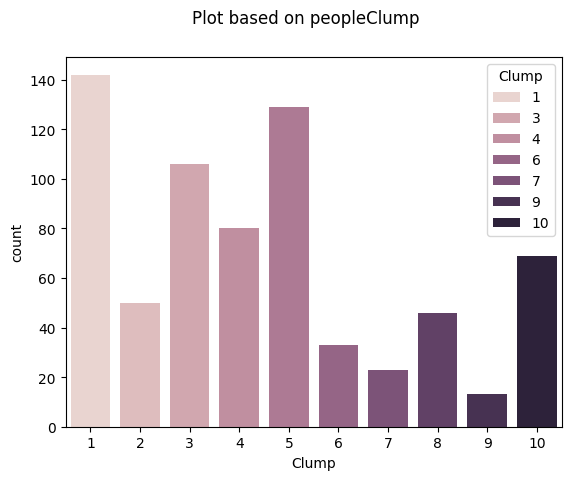

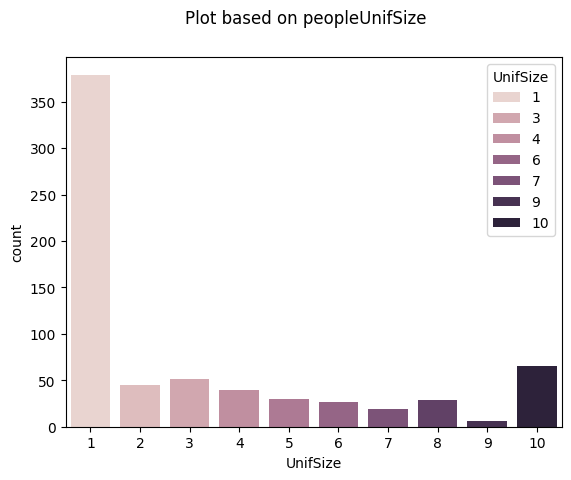

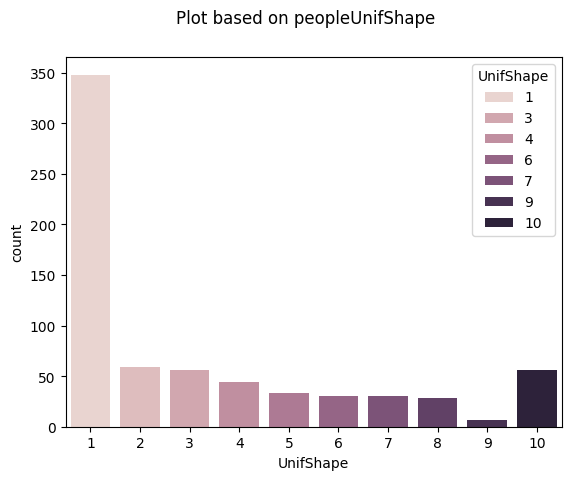

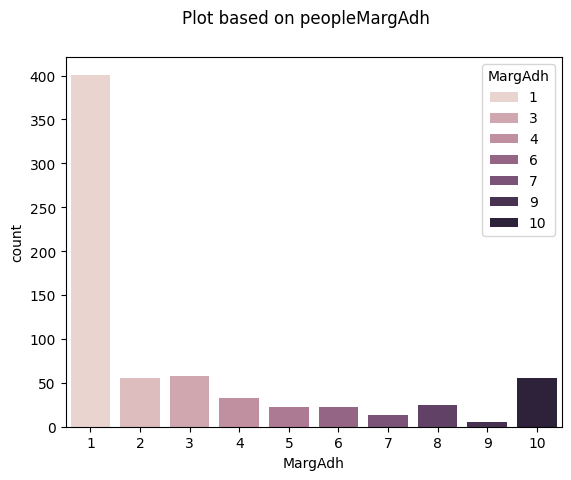

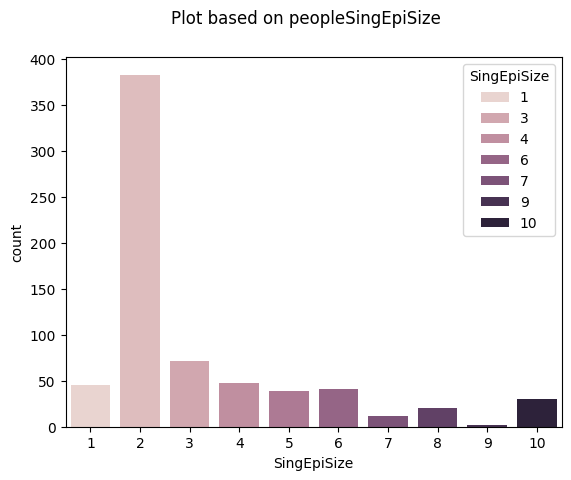

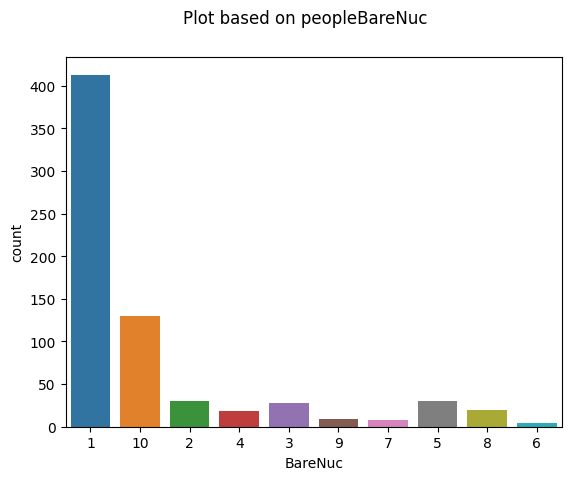

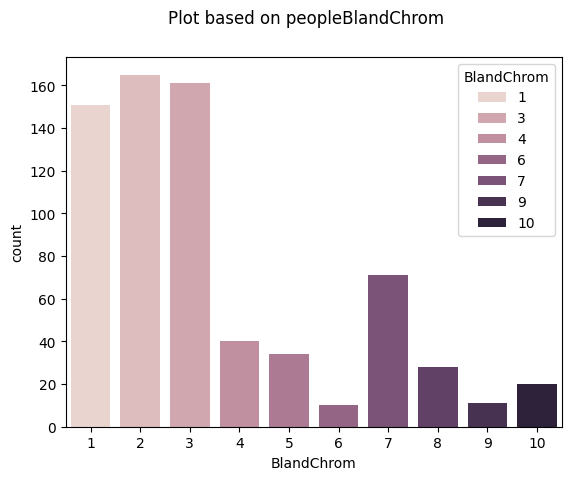

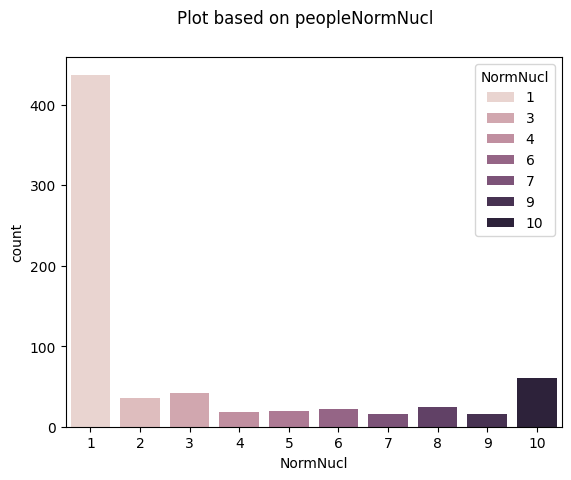

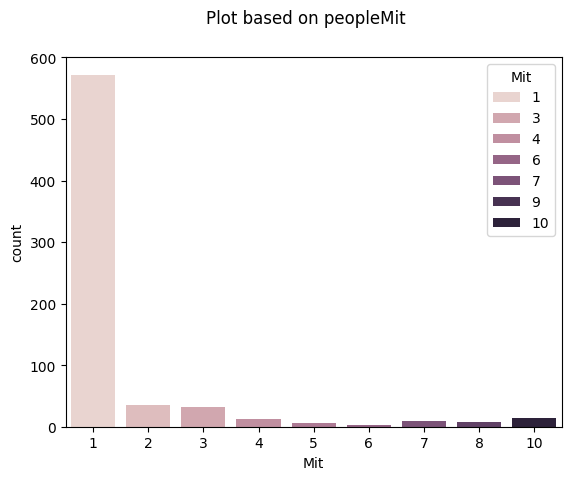

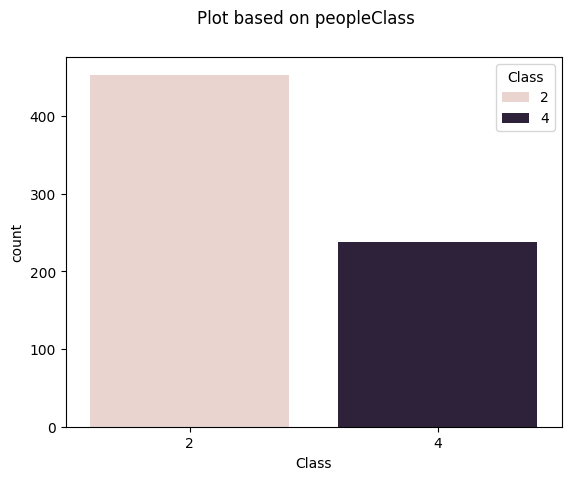

In [647]:
for column in df.columns:
    sns.countplot(data=df, x=column, hue=column)
    plt.suptitle('Plot based on people' + column)
    plt.show();

## **Model Training**

**Notice :**

In this section, we will not repeat the explanations we gave in the regression section, we will only implement the same frameworks for a classification task.

In necessery parts we have comments in each section.(Thanks for your effort)

### **`Multilayer Perceptron with Scikit-Learn - Classification`**

**Import libraries**

In [648]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

**Data Prepration**

In [649]:
# Separate features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create an instance of the MLPClassifier and train it using the training data.

              precision    recall  f1-score   support

           2       0.99      0.96      0.97        92
           4       0.92      0.98      0.95        47

    accuracy                           0.96       139
   macro avg       0.95      0.97      0.96       139
weighted avg       0.97      0.96      0.96       139



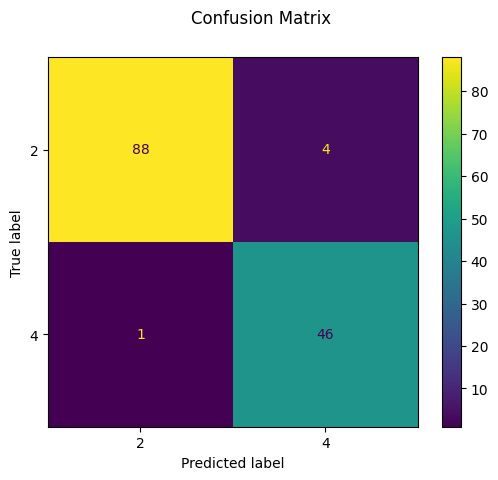

In [650]:
# Initialize and train the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=27)
mlp_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp_classifier.predict(X_test_scaled)

#Classification report
print(classification_report(y_test, y_pred))

#ploting
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()


### **`4-layer feedforward network with Keras - Classification`**

In [651]:
# Convert class labels to numerical format (assuming binary classification)
y_train = y_train.map({2: 0, 4: 1})
y_test = y_test.map({2: 0, 4: 1})

Epoch 1/10


16/16 [==============================] - 1s 12ms/step - loss: 0.4926 - accuracy: 0.8448 - val_loss: 0.2495 - val_accuracy: 0.9821
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1705 - accuracy: 0.9698 - val_loss: 0.0794 - val_accuracy: 0.9821
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0891 - accuracy: 0.9677 - val_loss: 0.0615 - val_accuracy: 0.9821
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.9677 - val_loss: 0.0590 - val_accuracy: 0.9821
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0737 - accuracy: 0.9698 - val_loss: 0.0585 - val_accuracy: 0.9821
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0697 - accuracy: 0.9698 - val_loss: 0.0581 - val_accuracy: 0.9821
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9718 - val_loss: 0.0601 - val_accuracy: 0.9821
Epoch 8/10
16/16 [============

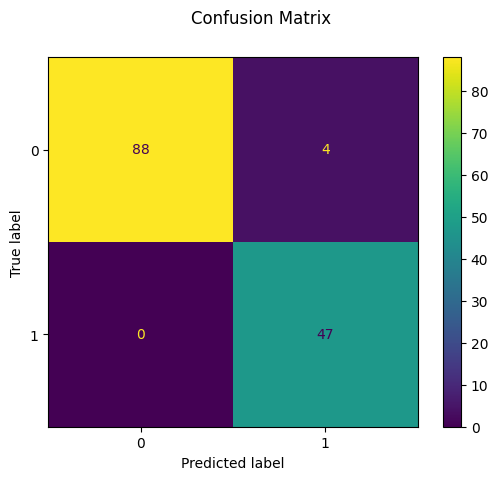

In [652]:
# Import necessary libraries
from keras.optimizers import Adam

# Set a random seed for reproducibility
seed(27)
tf.random.set_seed(27)

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

#Classification report
print(classification_report(y_test, y_pred))

#ploting
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()


Let's see the progress of our algorithm in each iteration:

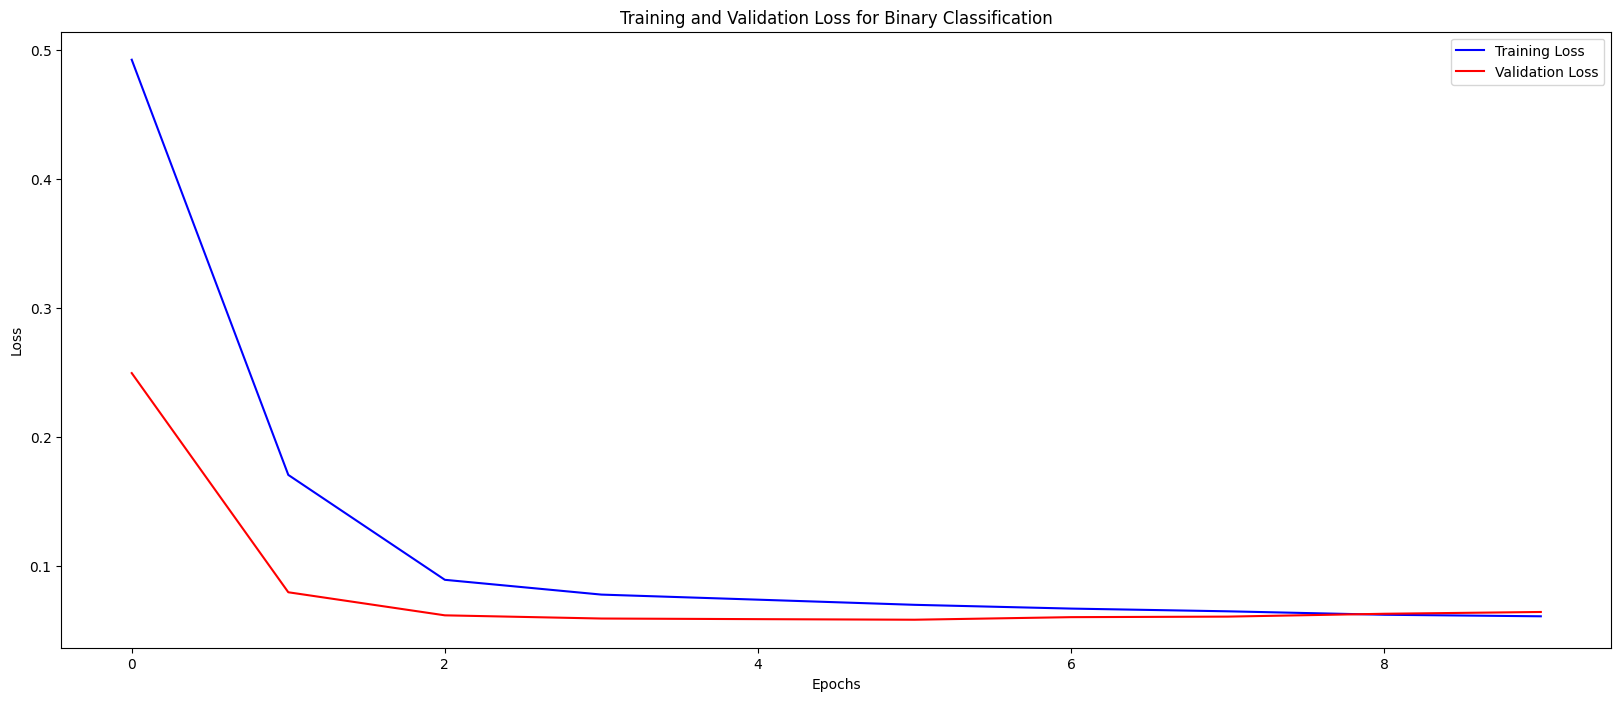

In [653]:
# Visualize the training and validation loss
hist_df = pd.DataFrame(history.history)
plt.figure(figsize=(20, 8))
plt.plot(hist_df['loss'], 'blue', label='Training Loss')
plt.plot(hist_df['val_loss'], 'red', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.title('Training and Validation Loss for Binary Classification')

plt.show()

### **`4-layer feedforward network with Pytorch - Classification`**

In [654]:
# Set a random seed for reproducibility
seed(27)
tf.random.set_seed(27)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Combine features and labels into PyTorch datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define the neural network model
model = nn.Sequential(
    nn.Linear(X_train_scaled.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Sigmoid()
)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert data to PyTorch DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Train the model
num_epochs = 10
train_losses = []

for epoch in range(num_epochs):
    epoch_losses = []
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())

    epoch_loss = sum(epoch_losses) / len(epoch_losses)
    train_losses.append(epoch_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

Epoch [1/10], Loss: 0.6045
Epoch [2/10], Loss: 0.3884
Epoch [3/10], Loss: 0.1791
Epoch [4/10], Loss: 0.0875
Epoch [5/10], Loss: 0.0805
Epoch [6/10], Loss: 0.0695
Epoch [7/10], Loss: 0.0764
Epoch [8/10], Loss: 0.0648
Epoch [9/10], Loss: 0.0592
Epoch [10/10], Loss: 0.0584


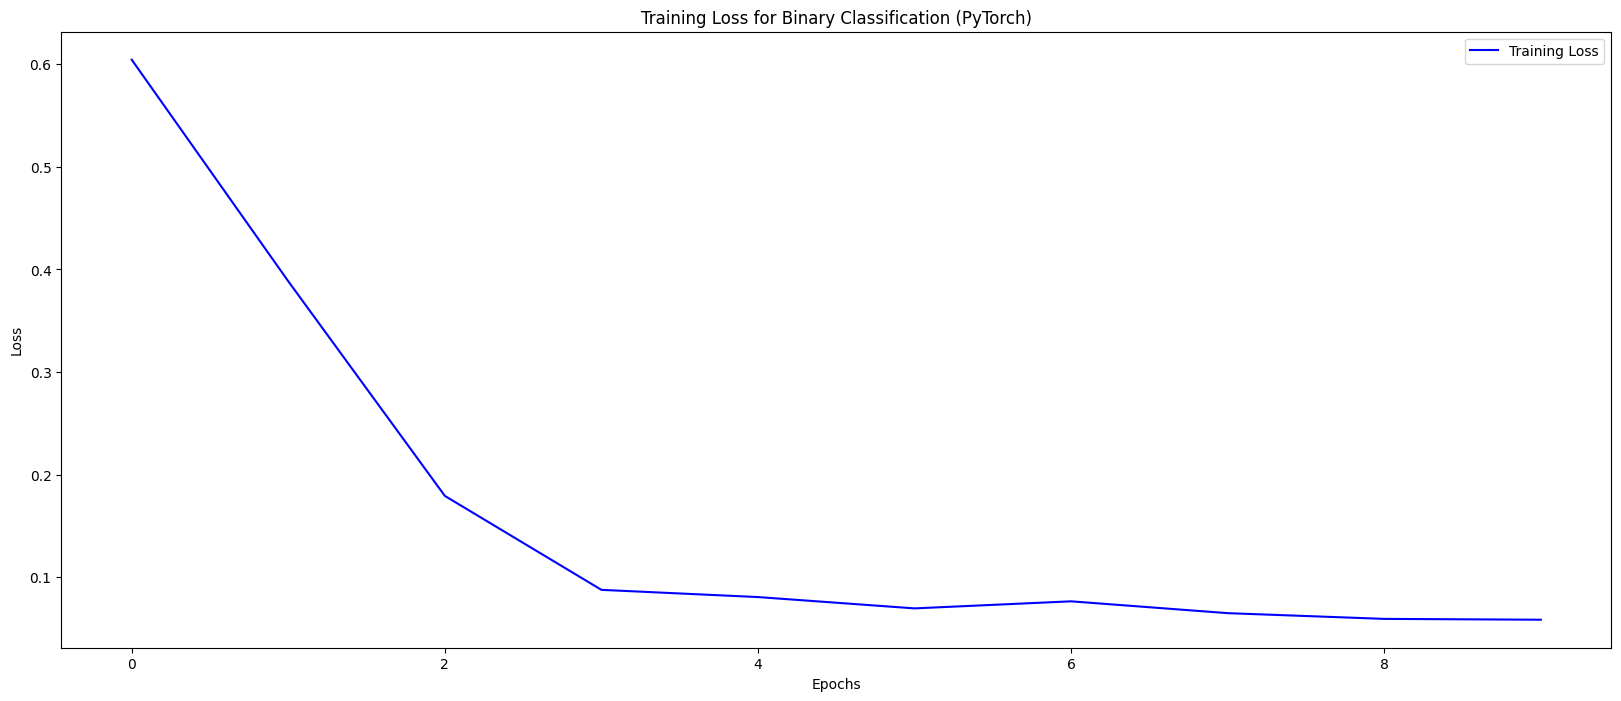

In [655]:
# Plot the training loss
plt.figure(figsize=(20, 8))
plt.plot(train_losses, 'blue', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.title('Training Loss for Binary Classification (PyTorch)')

plt.show()

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        92
           1       0.92      1.00      0.96        47

    accuracy                           0.97       139
   macro avg       0.96      0.98      0.97       139
weighted avg       0.97      0.97      0.97       139



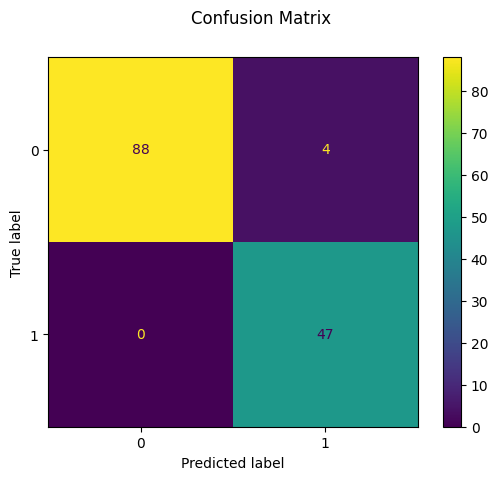

In [656]:
# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    y_pred_prob = model(X_test_tensor)
    y_pred = (y_pred_prob > 0.5).float()

# Convert PyTorch tensors to numpy arrays
y_test_np = y_test_tensor.numpy()
y_pred_np = y_pred.numpy()

#Classification report
print(classification_report(y_test, y_pred))

#ploting
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()


### **`4-layer non-sequential feedforward network with Keras - Classification`**

Epoch 1/10
16/16 [==============================] - 1s 12ms/step - loss: 0.4584 - accuracy: 0.9254 - val_loss: 0.2422 - val_accuracy: 0.9821
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.1685 - accuracy: 0.9698 - val_loss: 0.0817 - val_accuracy: 0.9821
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.9657 - val_loss: 0.0613 - val_accuracy: 0.9821
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9698 - val_loss: 0.0579 - val_accuracy: 0.9821
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0688 - accuracy: 0.9677 - val_loss: 0.0574 - val_accuracy: 0.9821
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.0646 - accuracy: 0.9698 - val_loss: 0.0558 - val_accuracy: 0.9821
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0619 - accuracy: 0.9738 - val_loss: 0.0570 - val_accuracy: 0.9821
Epoch 8/10
16/16 [=

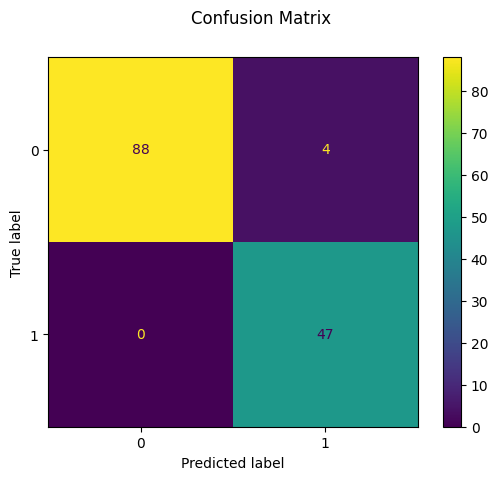

In [657]:
# Set a random seed for reproducibility
seed(27)
tf.random.set_seed(27)

# Define the architecture of the neural network
input_layer = Input(shape=(X_train_scaled.shape[1],), name='input_layer')
hidden_layer1 = Dense(128, activation='relu', name='hidden_layer1')(input_layer)
hidden_layer2 = Dense(64, activation='relu', name='hidden_layer2')(hidden_layer1)
hidden_layer3 = Dense(32, activation='relu', name='hidden_layer3')(hidden_layer2)
output_layer = Dense(1, activation='sigmoid', name='output_layer')(hidden_layer3)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(float)

#Classification report
print(classification_report(y_test, y_pred))

#ploting
confussion_matrix = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
confussion_matrix.figure_.suptitle("Confusion Matrix")
plt.show()

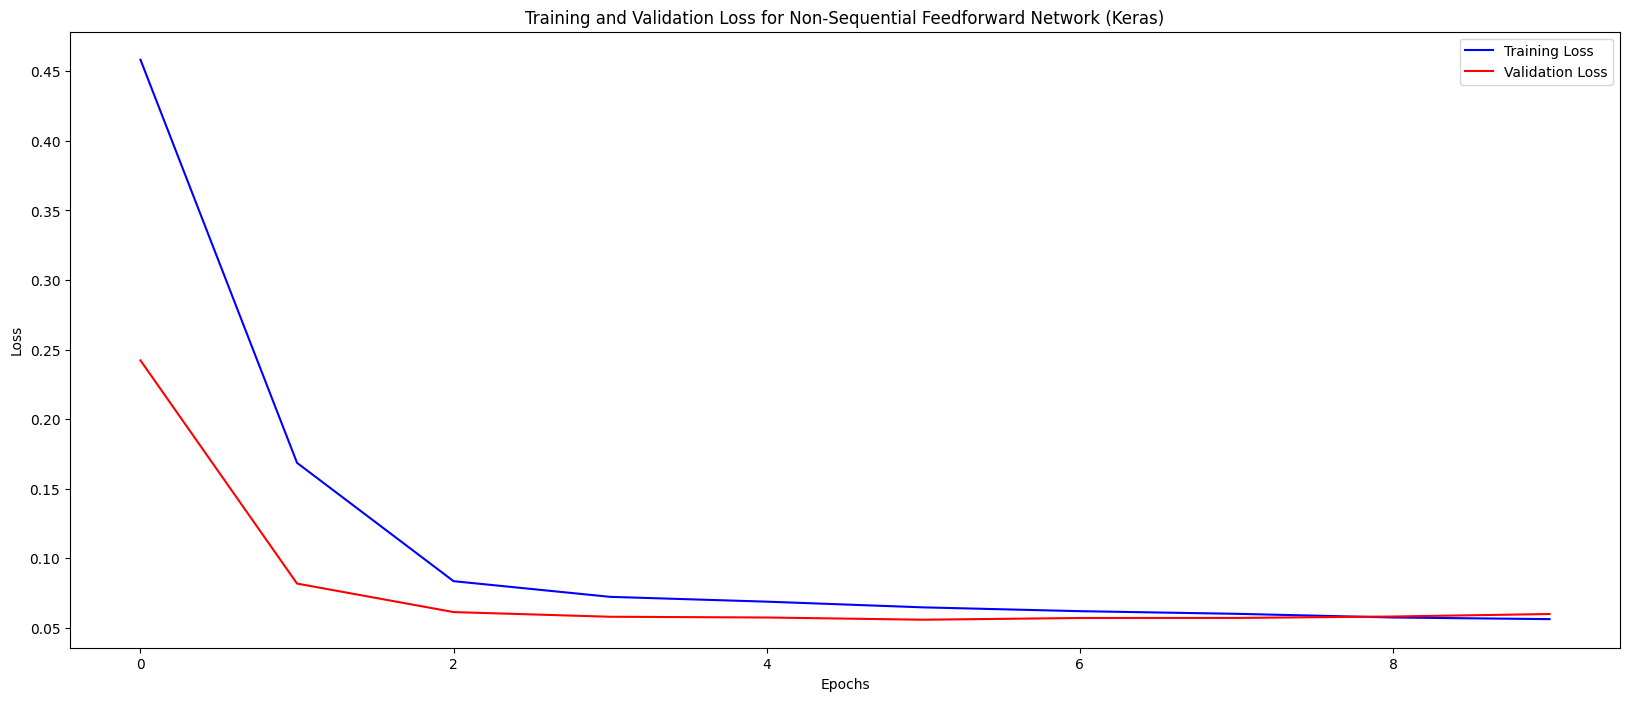

In [658]:
# Plot the training and validation loss
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'], 'blue', label='Training Loss')
plt.plot(history.history['val_loss'], 'red', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.title('Training and Validation Loss for Non-Sequential Feedforward Network (Keras)')

plt.show()

<hr>

## **Question**

#### Explain why neural networks are so powerful and what the diffcult part is in designing neural networks.



**why neural networks are so powerful ?**

Neural networks are powerful because they can be used to predict any given function with reasonable approximation. If we can represent a problem as a mathematical function and we have data that represents that function correctly, a deep learning model can, given enough resources, be able to approximate that function.

One of the key reasons why neural networks are so powerful is their ability to learn complex patterns and relationships in data. Unlike traditional algorithms that rely on explicit instructions, neural networks can automatically extract features and discover hidden patterns within the data.

**what the diffcult part is in designing neural networks?**

One of the main challenges is the need for a large amount of data for effective neural network training. Neural networks need huge data sets to learn patterns and make accurate predictions. Acquiring and labeling such large data sets can be time-consuming and expensive, especially in domains where data are scarce or difficult to obtain.

Another challenge is the computing power required to train and run neural networks. Deep neural networks with multiple layers and millions of parameters require significant computing resources. This can limit their use in environments with limited resources or in low-cost devices.

Interpretability of neural networks is another challenge. As neural networks become more complex, it becomes increasingly difficult to understand how they arrive at their decisions or predictions. This lack of interpretability can be problematic, especially in critical applications where clarity and explainability are required.


#### **Other Challenging factors :**

**Architecture Choice:** 

Choosing the right neural network architecture is crucial and can significantly impact performance. Deciding on the number of layers, types of layers, and their connectivity requires a deep understanding of the problem domain and experimentation.

**Hyperparameter Tuning:** 

Neural networks have various hyperparameters, such as learning rate, batch size, and regularization strength. Tuning these hyperparameters is often an iterative and time-consuming process, requiring careful consideration.

**Initialization and Weight Initialization:** 

Choosing appropriate initial weights for the neural network is vital for efficient training. Poor weight initialization can lead to slow convergence or getting stuck in local minima.

**Vanishing and Exploding Gradients:** 

In deep neural networks, gradients can become very small (vanishing) or very large (exploding) during backpropagation. Mitigating these issues often involves using specific weight initialization methods and activation functions.

**Transfer Learning:** 

Leveraging pre-trained models for transfer learning can be challenging. Knowing when and how to adapt pre-trained models to a specific task requires domain knowledge.

**Selecting Activation Functions:** 

Choosing appropriate activation functions for each layer is important. Different activation functions have different properties, and selecting the right ones can impact the network's ability to learn complex patterns.

